In [0]:
# Import the machine learning libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [0]:
# Load the MNIST dataset.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [61]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


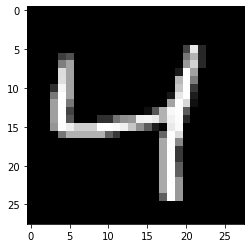

In [62]:
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))

In [63]:
# For faster training on smaller dataset
only_zeros = X_train[y_train==0]
print(only_zeros.shape)

(5923, 28, 28)


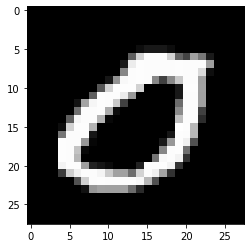

In [64]:
plt.imshow(only_zeros[70], cmap=plt.get_cmap('gray'))

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Reshape,Flatten
from tensorflow.keras.models import Sequential

In [0]:
np.random.seed(42)
tf.random.set_seed(42)
codings_size = 100

In [0]:
generator = Sequential()
generator.add(Dense(100, activation="relu", input_shape=[codings_size]))
generator.add(Dense(150, activation='relu'))
generator.add(Dense(784, activation="sigmoid")) # 28*28 = 784
generator.add(Reshape([28,28]))

In [0]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150, activation='relu'))
discriminator.add(Dense(100, activation='relu'))
discriminator.add(Dense(1, activation="sigmoid"))

discriminator.compile(loss="binary_crossentropy", optimizer="adam")

In [0]:
GAN = Sequential([generator, discriminator])

In [0]:
discriminator.trainable = False

In [0]:
GAN.compile(loss="binary_crossentropy", optimizer="adam")

In [72]:
GAN.layers

In [73]:
GAN.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 28, 28)            143634    
_________________________________________________________________
sequential_7 (Sequential)    (None, 1)                 132951    
Total params: 276,585
Trainable params: 143,634
Non-trainable params: 132,951
_________________________________________________________________


In [74]:
GAN.layers[0].summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_13 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_14 (Dense)             (None, 784)               118384    
_________________________________________________________________
reshape_2 (Reshape)          (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [75]:
GAN.layers[1].summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 150)               117750    
_________________________________________________________________
dense_16 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 101       
Total params: 132,951
Trainable params: 0
Non-trainable params: 132,951
_________________________________________________________________


In [0]:
batch_size = 32
my_data = X_train
#my_data = only_zeros # For faster training on smaller dataset

In [0]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [78]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [0]:
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [0]:
epochs = 2

In [81]:
# Training Loop.
%%time

# Grab the seprate components
generator, discriminator = GAN.layers

# For every epcoh
for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    i = 0
    # For every batch in the dataset
    for X_batch in dataset:
        i=i+1
        if i%100 == 0:
            print(f"\tCurrently on batch number {i} of {len(my_data)//batch_size}")
        #####################################
        ## TRAINING THE DISCRIMINATOR ######
        ###################################
        
        # Create Noise
        noise = tf.random.normal(shape=[batch_size, codings_size])
        
        # Generate numbers based just on noise input
        gen_images = generator(noise)
        
        # Concatenate Generated Images against the Real Ones
        # TO use tf.concat, the data types must match!
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch,tf.float32)], axis=0)
        
        # Targets set to zero for fake images and 1 for real images
        y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
        
        # This gets rid of a Keras warning
        discriminator.trainable = True
        
        # Train the discriminator on this batch
        discriminator.train_on_batch(X_fake_vs_real, y1)
        
        
        #####################################
        ## TRAINING THE GENERATOR     ######
        ###################################
        
        # Create some noise
        noise = tf.random.normal(shape=[batch_size, codings_size])
        
        # We want discriminator to belive that fake images are real
        y2 = tf.constant([[1.]] * batch_size)
        
        # Avois a warning
        discriminator.trainable = False
        
        GAN.train_on_batch(noise, y2)
        
print("TRAINING COMPLETE")

Currently on Epoch 1
	Currently on batch number 100 of 1875
	Currently on batch number 200 of 1875
	Currently on batch number 300 of 1875
	Currently on batch number 400 of 1875
	Currently on batch number 500 of 1875
	Currently on batch number 600 of 1875
	Currently on batch number 700 of 1875
	Currently on batch number 800 of 1875
	Currently on batch number 900 of 1875
	Currently on batch number 1000 of 1875
	Currently on batch number 1100 of 1875
	Currently on batch number 1200 of 1875
	Currently on batch number 1300 of 1875
	Currently on batch number 1400 of 1875
	Currently on batch number 1500 of 1875
	Currently on batch number 1600 of 1875
	Currently on batch number 1700 of 1875
	Currently on batch number 1800 of 1875
Currently on Epoch 2
	Currently on batch number 100 of 1875
	Currently on batch number 200 of 1875
	Currently on batch number 300 of 1875
	Currently on batch number 400 of 1875
	Currently on batch number 500 of 1875
	Currently on batch number 600 of 1875
	Currently on

In [82]:
noise = tf.random.normal(shape=[10, codings_size])
noise.shape

TensorShape([10, 100])

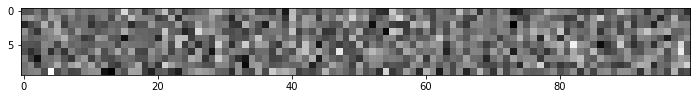

In [83]:
plt.figure(figsize=(12, 3))
plt.imshow(noise, cmap=plt.get_cmap('gray'))

In [84]:
%%time
image = generator(noise)

CPU times: user 4.03 ms, sys: 0 ns, total: 4.03 ms
Wall time: 5.39 ms


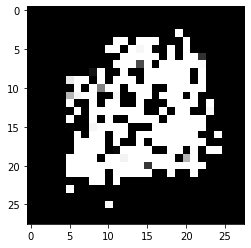

In [85]:
plt.imshow(image[3], cmap=plt.get_cmap('gray'))

In [86]:
image.shape

TensorShape([10, 28, 28])

0


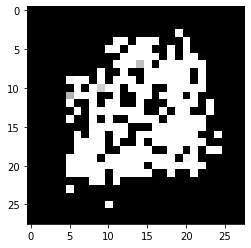

1


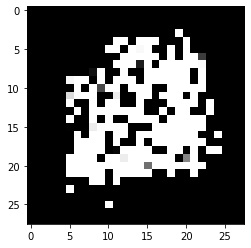

2


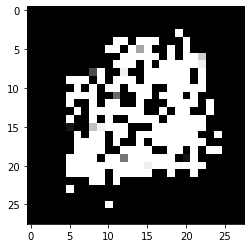

3


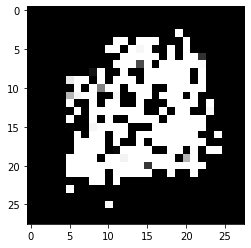

4


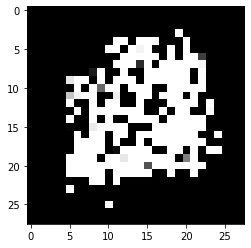

5


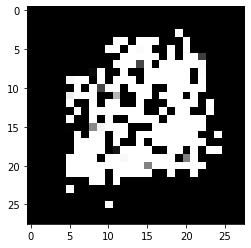

6


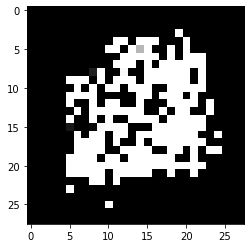

7


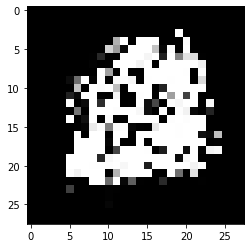

8


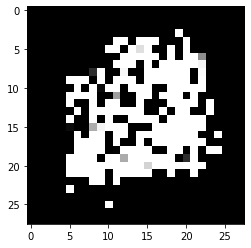

9


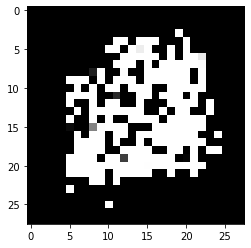

In [87]:
# Visulize.
for i in range(0, len(image)):
    print(i)
    tmp = image[i,:,:]
    #tmp = tmp.reshape(28, 28)
    plt.imshow(tmp, cmap='gray')
    plt.show()